In [2]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt

In [3]:
# Create X and Y coordinates for ellipse
# TODO: Play around with these values to understand what each variable means
a, b = 5, 100

t = np.arange(0, 100, 0.01)

x = a*np.sin(t)
y = b*np.cos(t)

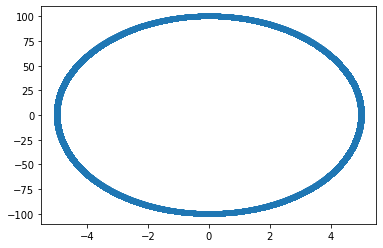

In [4]:
# Display the ellipse
plt.plot(x, y, '*-')
plt.show()

In [5]:
# Rotate the points of the ellipse
cc = np.cos(np.pi / 3)
ss = np.sin(np.pi / 3)

R = np.array([[cc, ss],
              [-ss, cc]])

pts = np.stack((x, y))

rpts = np.dot(R, pts)

In [6]:
rpts.shape

(2, 10000)

In [7]:
# TODO: Compute the rotated angle in radians and degrees from rpts
def get_angle(pts,rpts):
    # Find angle of original axis
    U = svd(pts)[0]
    # Major axis is first col minor axis second col
    ang_orig= np.arctan(U[0][1] / U[0][0])
    # Find angle on rotated axis
    U = svd(rpts)[0]
    ang_rot = np.arctan(U[0][1] / U[0][0])
    return ang_orig-ang_rot

# Estimated Angle
angle = get_angle(pts,rpts)
print(f'Angle Radians: {angle}\nAngle Degrees: {np.degrees(angle)}\n')

# Set Estimated angle for Second part
est_rot_angle = angle

# TODO: Change the rotation angle and repeat computation
# New angle 30 Degrees
cc = np.cos(np.pi / 6)
ss = np.sin(np.pi / 6)
R = np.array([[cc, ss],
              [-ss, cc]])
rpts2 = np.dot(R, pts)

# Estimated Angle
angle = get_angle(pts,rpts2)
print(f'Angle Radians: {angle}\nAngle Degrees: {np.degrees(angle)}\n')


Angle Radians: 1.0471975511965979
Angle Degrees: 60.00000000000001

Angle Radians: 0.5235987755982987
Angle Degrees: 29.999999999999993



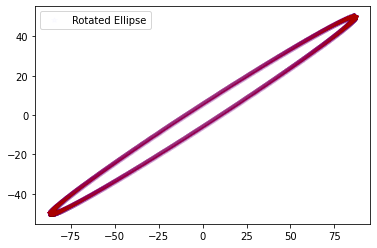

In [8]:
# Rotate original points based on estimate
cc = np.cos(est_rot_angle)
ss = np.sin(est_rot_angle)

R = np.array([[cc, ss],
              [-ss, cc]])

pts = np.stack((x, y))

est_rpts = np.dot(R, pts)

# Display results
plt.plot(rpts[0,:], rpts[1,:], 'b*', alpha=0.01)
plt.plot(est_rpts[0,:], est_rpts[1,:], 'r*', alpha=0.01)
# TODO: add legend
plt.legend(["Rotated Ellipse"])
plt.show()